In [1]:
import os
import pandas as pd
import numpy as np

path = r'train'


folders = []
counts = []
category = []

for i, foldername in enumerate(os.listdir(path)):
    folderpath = os.path.join(path, foldername)
    count = 0
    for filename in os.listdir(folderpath):
        if filename.endswith('.JPG'):
            count += 1
        if filename.endswith('.jpg'):
            count += 1
    folders.append(foldername)
    counts.append(count)
    category.append(foldername.split('__')[0])

unique_category = list(set(category))
df = pd.DataFrame({ 'File Name': folders, 'Image Count': counts})

print(f"Plant category: {unique_category}")

Plant category: ['Pepper,_bell', 'Peach', 'Cherry_(including_sour)', 'Orange', 'Potato', 'Blueberry', 'Tomato', 'Soybean', 'Raspberry', 'Squash', 'Apple', 'Corn_(maize)', 'Grape', 'Strawberry']


In [2]:
df

,File Name,Image Count
0,Apple___Apple_scab,1764
1,Apple___Black_rot,1738
2,Apple___Cedar_apple_rust,1540
3,Apple___healthy,1757
4,Blueberry___healthy,1589
5,Cherry_(including_sour)___Powdery_mildew,1472
6,Cherry_(including_sour)___healthy,1597
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1436
8,Corn_(maize)___Common_rust_,1668
9,Corn_(maize)___Northern_Leaf_Blight,1669


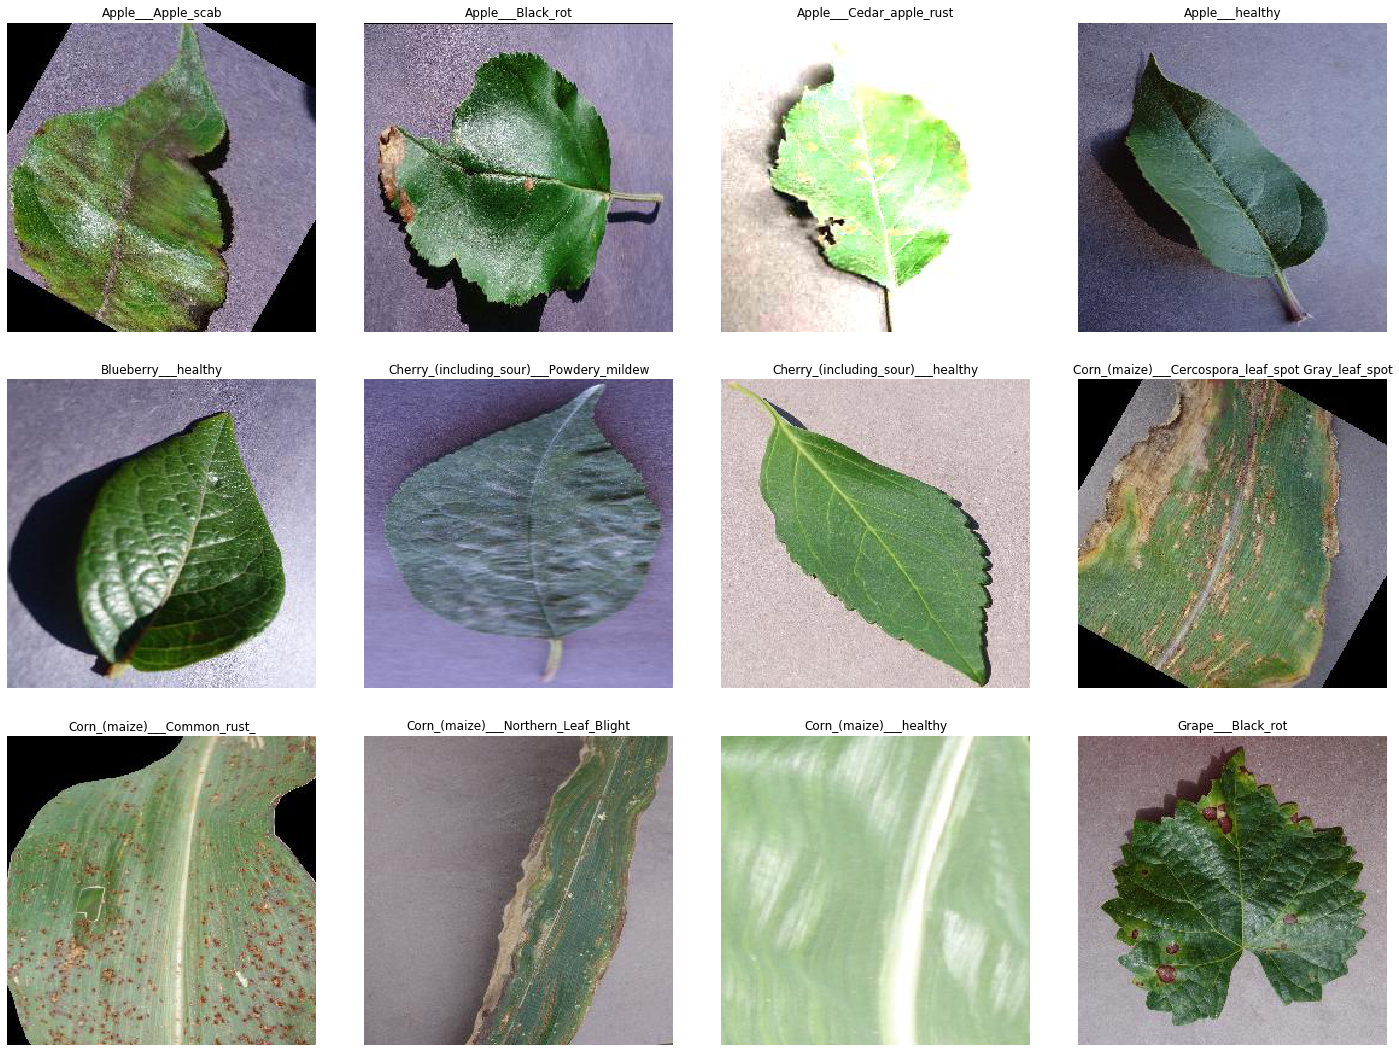

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset
dataset_path = "train"

# Check if the path exists
if not os.path.exists(dataset_path):
    print("The specified dataset path does not exist. Please check the path.")
else:
    # List the first 12 subfolders
    subfolders = sorted([f.path for f in os.scandir(dataset_path) if f.is_dir()])[:12]

    # Initialize a figure for plotting
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 4 rows, 3 columns

    for i, folder in enumerate(subfolders):
        images = [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        selected_image = random.choice(images)
        img = Image.open(selected_image)
        
        # Plotting the image
        ax = axes[i // 4, i % 4]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(folder))

    plt.tight_layout()
    plt.show()


Number of categories: 38
Number of plants: 14
Plant list: ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


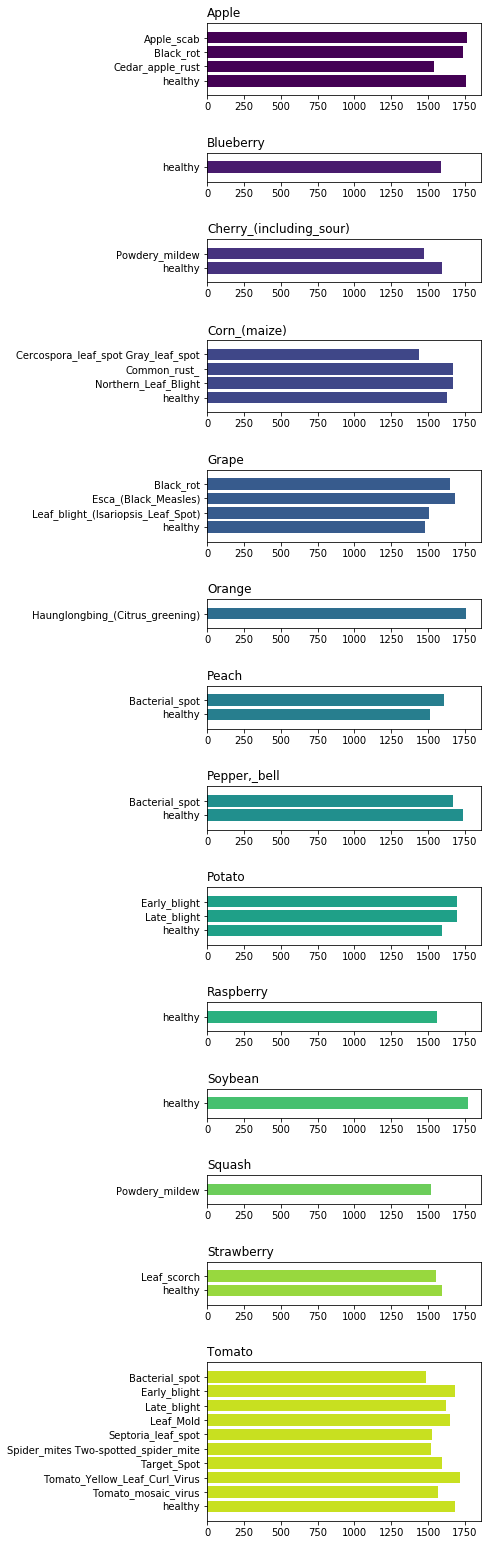

In [4]:
import os
from typing import Dict, DefaultDict
from collections import defaultdict
import numpy as np
import pandas as pd

TRAIN_DIR = "train"

def get_category_dict(path: str = TRAIN_DIR) -> Dict[str, int]:
    categories = os.listdir(path)
    category_dict = {}
    for category in categories:
        category_dict[category] = len(os.listdir(path + '/' + category))
    return category_dict

category_dict = get_category_dict()
print(f"Number of categories: {len(category_dict)}")
df = pd.DataFrame(list(category_dict.items()), columns=['Category', 'Count'])
df

def get_plant_dict(category_dict: Dict[str, int]) -> DefaultDict[str, DefaultDict[str, int]]:
    plant_dict = defaultdict(lambda: defaultdict(int))
    for category, num in category_dict.items():
        plant, disease = category.split('___', 1)
        plant_dict[plant][disease] = num
    return plant_dict

plant_dict= get_plant_dict(category_dict)
print(f"Number of plants: {len(plant_dict)}")
print(f"Plant list: {list(plant_dict.keys())}")

def plot_by_plant(data):
    barwidth = 0.2   # inch per bar
    spacing = 4      # spacing between subplots in units of barwidth
    figx = 5         # figure width in inch
    left = 4         # left margin in units of bar width
    right = 2        # right margin in units of bar width
    tc = len(data)   # "total_categories", holds how many charts to create
    max_values = []  # holds the maximum number of bars to create
    
    for category, entries in data.items():
        max_values.append(len(entries))
    max_values = np.array(max_values)
    # total figure height:
    figy = ((np.sum(max_values) + tc) + (tc + 1) * spacing) * barwidth  # inch

    fig = plt.figure(figsize=(figx, figy))
    ax = None
    color_cycle = plt.cm.get_cmap('viridis').colors

    for index, (category, entries) in enumerate(data.items()):
        entry_names_values = sorted(entries.items(), key=lambda x: x[0] == 'healthy')
        entry_names, values = zip(*entry_names_values)

        if not entry_names:
            continue  # do not create empty charts

        y_ticks = range(1, len(entry_names) + 1)
        coord = [left * barwidth / figx,
                 1 - barwidth * ((index + 1) * spacing + np.sum(max_values[:index + 1]) + index + 1) / figy,
                 1 - (left + right) * barwidth / figx,
                 (max_values[index] + 1) * barwidth / figy]

        ax = fig.add_axes(coord, sharex=ax)
        ax.barh(y_ticks, values, color=color_cycle[index * (len(color_cycle) // len(data))])
        ax.set_ylim(0, max_values[index] + 1)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(entry_names)
        ax.invert_yaxis()
        ax.set_title(category, loc="left")
    
    plt.show()

plot_by_plant(plant_dict)